## Buy-hold Stratergy

In [1]:
import pandas as pd
from pandas import DatetimeIndex
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
%matplotlib inline

Import Data

In [2]:
bitcoin_df = pd.read_excel("./CRYPTOCURRENCY/BITCOIN.xlsx")
litecoin_df = pd.read_excel("./CRYPTOCURRENCY/LITECOIN.xlsx")
etherium_df = pd.read_excel("./CRYPTOCURRENCY/ETHEREUM.xlsx")

In [3]:
#create date as the dataframe index
bitcoin_df.index = DatetimeIndex(bitcoin_df['Date'])
etherium_df.index = DatetimeIndex(etherium_df['Date'])
litecoin_df.index = DatetimeIndex(litecoin_df['Date'])

Reset index as Date

In [4]:
#drop original date column
bitcoin_df.drop("Date",axis =1,inplace=True)
etherium_df.drop("Date",axis =1,inplace=True)
litecoin_df.drop("Date",axis =1,inplace=True)

In [5]:
bitcoin_df.describe()

,Open,High,Low,Close,Market Cap
count,1965.000000,1965.000000,1965.000000,1965.000000,1.965000e+03
mean,2134.428611,2203.326555,2057.606601,2137.453201,3.513299e+10
std,3414.500919,3545.669762,3254.862230,3415.346610,5.798800e+10
min,68.510000,74.560000,65.530000,68.430000,7.792550e+08
25%,297.850000,314.390000,292.410000,304.620000,4.213280e+09
50%,584.650000,591.100000,573.430000,584.650000,7.770550e+09
75%,1723.890000,1788.440000,1661.910000,1734.450000,2.813230e+10
max,19475.800000,20089.000000,18974.100000,19497.400000,3.261410e+11


In [6]:
etherium_df.head()

,Open*,High,Low,Close**,Volume,Market Cap
Date,,,,,,
2015-08-07,2.830000,3.540000,2.520000,2.770000,164329,4.650511e+05
2015-08-08,2.790000,2.800000,0.714725,0.753325,674188,1.679110e+08
2015-08-09,0.706136,0.879810,0.629191,0.701897,532170,4.263760e+07
2015-08-10,0.713989,0.729854,0.636546,0.708448,405283,4.313000e+07
2015-08-11,0.708087,1.130000,0.663235,1.070000,1463100,4.279650e+07


In [7]:
litecoin_df.head()

,Open*,High,Low,Close**,Volume,Market Cap
Date,,,,,,
2013-04-28,4.30,4.40,4.18,4.35,-,73773400
2013-04-29,4.37,4.57,4.23,4.38,-,74952704
2013-04-30,4.40,4.57,4.17,4.30,-,75726800
2013-05-01,4.29,4.36,3.52,3.80,-,73901200
2013-05-02,3.78,4.04,3.01,3.37,-,65242700


### Calculate HLC for each currency

In [8]:
bitcoin_df['HLC'] = (bitcoin_df.High + bitcoin_df.Low + 2*bitcoin_df.Close)/4
etherium_df['HLC'] = (etherium_df.High+ etherium_df.Low+ 2*etherium_df["Close**"])/4
litecoin_df['HLC'] = (litecoin_df.High + litecoin_df.Low + 2*litecoin_df["Close**"])/4

In [9]:
data = litecoin_df.join(bitcoin_df, lsuffix='_litecoin', rsuffix='_bitcoin').join(etherium_df,rsuffix="_etherium")

In [10]:
profile_data = pd.DataFrame(data = [data.HLC_bitcoin,data.HLC_litecoin,data.HLC])
profile_data = profile_data.T

## Combine all cryptocurrencies as a single portfolio

In [11]:
profile_data.rename(columns={"HLC_bitcoin":"Bitcoin","HLC_litecoin":"Litecoin","HLC":"Etherium"},inplace=True)

### Considering dates where all three currencies existed i.e. from 2015-08-07

In [12]:
# profile_data.drop(columns="Etherium",inplace=True,axis=1)
profile_data.head()
profile_data.drop(profile_data[profile_data['Etherium'].isnull()].index,inplace=True)

#### Relative returns for the profile per day

In [13]:
# Relative returns
returns = profile_data.pct_change(1)
returns.tail()

,Bitcoin,Litecoin,Etherium
Date,,,
2018-09-09,-0.000496,0.003732,-0.030544
2018-09-10,0.002591,0.000792,-0.007354
2018-09-11,-0.000901,-0.036182,-0.041391
2018-09-12,0.000023,-0.041016,-0.044312
2018-09-13,0.022454,0.063332,0.129549


#### Log returns for the profile per day

In [14]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
log_returns = np.log(profile_data).diff()
log_returns.tail()

,Bitcoin,Litecoin,Etherium
Date,,,
2018-09-09,-0.000496,0.003726,-0.031020
2018-09-10,0.002588,0.000792,-0.007381
2018-09-11,-0.000901,-0.036853,-0.042272
2018-09-12,0.000023,-0.041881,-0.045324
2018-09-13,0.022206,0.061407,0.121818


### Plotting Return for the entire period

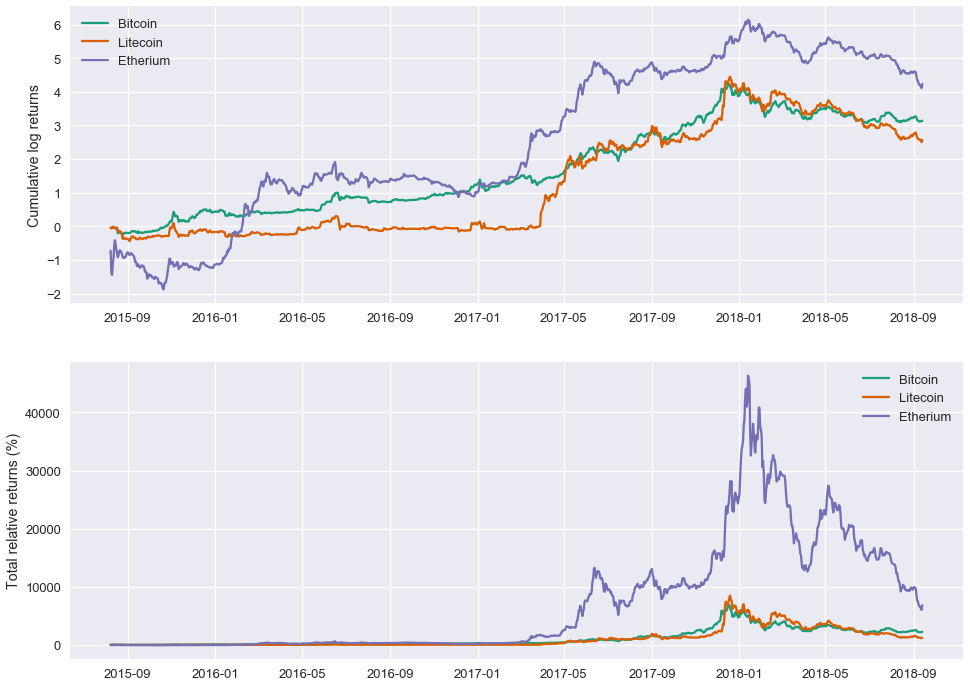

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

for c in log_returns:
    ax1.plot(log_returns.index, log_returns[c].cumsum(), label=str(c))

ax1.set_ylabel('Cumulative log returns')
ax1.legend(loc='best')

for c in log_returns:
    ax2.plot(log_returns.index, 100*(np.exp(log_returns[c].cumsum()) - 1), label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')

plt.show()

In [16]:
# weights_matrix = pd.concat([bitcoin_share.repeat(1965),litecoin_share.repeat(1965)],axis=1)
# weights_matrix.index = profile_data.index
# weights_matrix.columns = profile_data.columns
# weights_matrix.head()

### We distribute our amount eqally into 3 assests. Each one getting a ~ 33% of the share 

In [17]:
weights_matrix = pd.DataFrame(1 / 3, index=profile_data.index, columns=profile_data.columns)
weights_matrix.tail()

,Bitcoin,Litecoin,Etherium
Date,,,
2018-09-09,0.333333,0.333333,0.333333
2018-09-10,0.333333,0.333333,0.333333
2018-09-11,0.333333,0.333333,0.333333
2018-09-12,0.333333,0.333333,0.333333
2018-09-13,0.333333,0.333333,0.333333


In [18]:
# Initially the two matrices are multiplied. Note that we are only interested in the diagonal, 
# which is where the dates in the row-index and the column-index match.
temp_var = weights_matrix.dot(log_returns.transpose())

### Calculationg log returns for portfolio

In [19]:
# The numpy np.diag function is used to extract the diagonal and then
# a Series is constructed using the time information from the log_returns index
portfolio_log_returns = pd.Series(np.diag(temp_var), index=log_returns.index)
portfolio_log_returns.tail()

Date
2018-09-09   -0.009264
2018-09-10   -0.001334
2018-09-11   -0.026675
2018-09-12   -0.029061
2018-09-13    0.068477
dtype: float64

### Calculate total relative returns for the portfolio

In [20]:
total_relative_returns = (np.exp(portfolio_log_returns.cumsum()) - 1)

### Total Log Returns vs Relative Returns for the entire considered period

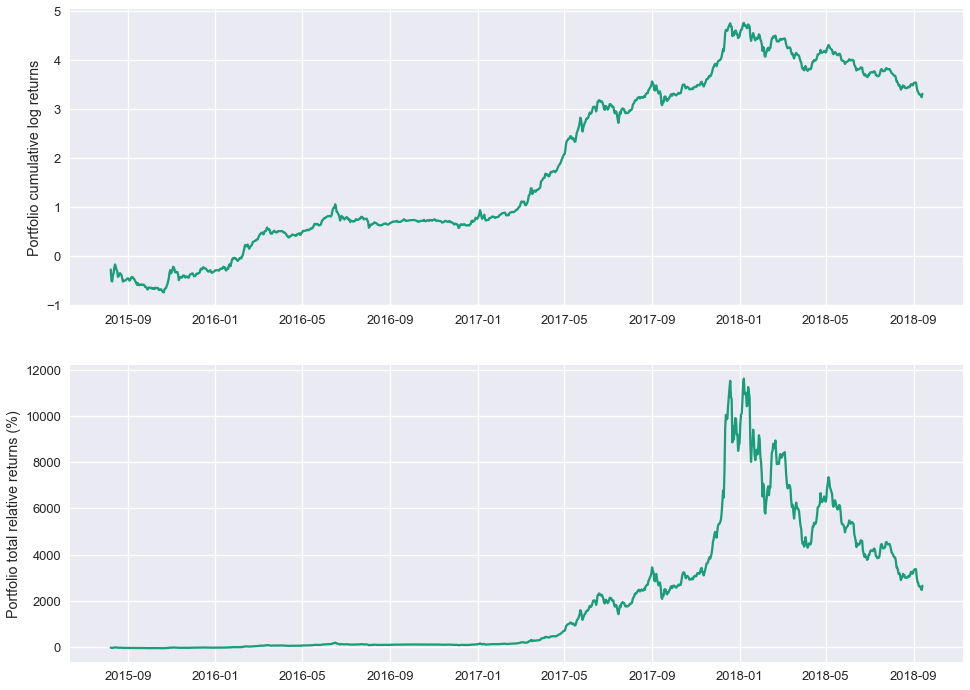

In [21]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

ax1.plot(portfolio_log_returns.index, portfolio_log_returns.cumsum())
ax1.set_ylabel('Portfolio cumulative log returns')

ax2.plot(total_relative_returns.index, 100 * total_relative_returns)
ax2.set_ylabel('Portfolio total relative returns (%)')

plt.show()

In [29]:
# Calculating the time-related parameters of the simulation
days_per_year = 365
total_days_in_simulation = profile_data.shape[0]
number_of_years = total_days_in_simulation / days_per_year
# The last data point will give us the total portfolio return
total_portfolio_return = total_relative_returns[-1]
# Average portfolio return assuming compunding of returns
average_yearly_return = (1 + total_portfolio_return)**(1 / number_of_years) - 1

print('Total portfolio return is:' +
      '{:5.2f}'.format(100 * total_portfolio_return) + '%')
print('Average yearly return is: ' +
      '{:5.2f}'.format(100 * average_yearly_return) + '%')

Total portfolio return is:2651.26%
Average yearly return is: 190.63%
